In [13]:
# 1. Install Required Libraries
!pip install nltk scikit-learn pandas matplotlib seaborn

# 2. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# 3. Upload Dataset
from google.colab import files
uploaded = files.upload()

# 4. Load Data
filename = list(uploaded.keys())[0]  # Automatically get the filename
df = pd.read_csv("amazon_reviews_balanced.csv")

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving amazon_reviews_balanced.csv to amazon_reviews_balanced (2).csv


,Review,Sentiment
0,This product is amazing!,Positive
1,I absolutely love it!,Positive
2,Works better than expected.,Positive
3,Very happy with the quality.,Positive
4,Totally worth the money.,Positive


Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.90      0.92        20
    Positive       0.90      0.95      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



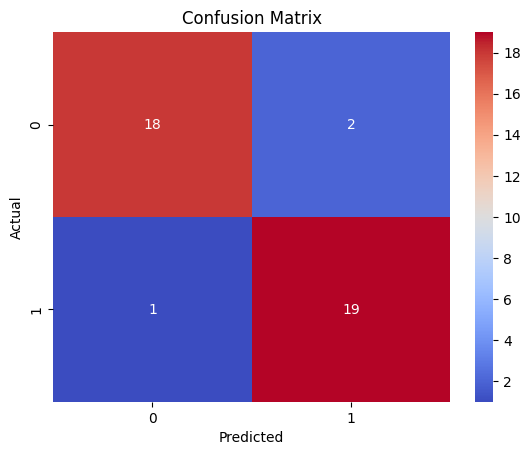

Predicted Sentiment: Positive


In [15]:
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['cleaned'] = df['Review'].apply(clean_text)
df.head()

X = df['cleaned']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)


y_pred = model.predict(X_test_vec)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    return model.predict(vectorized)[0]

# Example
example = "The quality is amazing and the delivery was super fast!"
print("Predicted Sentiment:", predict_sentiment(example))
